# Lab6 CNNs

## Team member 
Xiaoqing Zou, Jonathan Mejia, Rongwei Ji

## Data introduction 
Data source: https://www.kaggle.com/datasets/yousefmohamed20/oxford-102-flower-dataset


## 1.Preparation 
###  1.1  (1.5) Choose and explain what metric(s) you will use to evaluate your algorithm’s performance

We opt for the Confusion Matrix to assess the model algorithm. With multiple classes or follower categories, this metric enables us to discern which classes are effectively identified. It aids in recognizing areas where the model may encounter confusion between different classes, shedding light on its performance.

The Confusion Matrix highlights instances where the CNN misclassifies follower types. By identifying patterns of confusion between different types, we can uncover potential weaknesses in the model's feature extraction or classification process, guiding adjustments to enhance accuracy.


### 1.2 (1.5)Method Dividing  data 
The original data already divid into the train and test. Let's check them how they distribute.

train image amount: [27, 38, 35, 49, 36, 68, 73, 38, 44, 38, 36, 60, 65, 38, 49, 46, 34, 47, 72, 35, 34, 33, 36, 55, 62, 36, 61, 48, 36, 31, 28, 33, 62, 92, 44, 33, 44, 54, 97, 49, 100, 73, 33, 157, 61, 57, 38, 54, 73, 206, 67, 70, 47, 56, 92, 50, 86, 56, 35, 85, 36, 48, 42, 42, 88, 51, 36, 43, 46, 33, 51, 64, 77, 147, 142, 95, 83, 205, 112, 34, 70, 82, 135, 82, 104, 66, 48, 48, 51, 116, 153, 41, 66, 59, 53, 34, 132, 101, 72, 54, 68, 50]
test image amount: [5, 3, 8, 4, 6, 9, 9, 6, 3, 4, 3, 9, 6, 7, 5, 3, 2, 4, 7, 2, 5, 5, 3, 6, 9, 2, 14, 2, 6, 8, 5, 6, 7, 8, 8, 5, 6, 8, 14, 4, 16, 11, 3, 21, 3, 5, 3, 4, 8, 24, 8, 14, 4, 7, 8, 11, 14, 7, 9, 10, 8, 4, 4, 5, 7, 4, 4, 3, 3, 6, 4, 9, 11, 28, 14, 13, 4, 25, 14, 3, 10, 11, 13, 17, 14, 10, 10, 5, 6, 13, 15, 2, 14, 8, 11, 6, 16, 14, 9, 5, 4, 7]


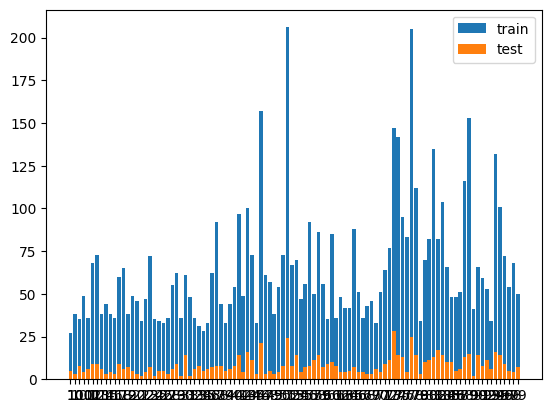

In [1]:
# check the 102 flowers dataset and how the image amount in different categre in train folder and test folder
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

# check the image amount in different categre in train folder and test folder

def check_image_amount():
    train_dir = './102 flower/flowers/train'
    test_dir = './102 flower/flowers/test'
    train_categories = os.listdir(train_dir)
    test_categories = os.listdir(test_dir)
    train_categories.sort()
    test_categories.sort()
    train_image_amount = []
    test_image_amount = []
    for category in train_categories:
        train_image_amount.append(len(os.listdir(os.path.join(train_dir, category))))
    for category in test_categories:
        test_image_amount.append(len(os.listdir(os.path.join(test_dir, category))))
    print('train image amount:', train_image_amount)
    print('test image amount:', test_image_amount)
    plt.bar(train_categories, train_image_amount, label='train')
    plt.bar(test_categories, test_image_amount, label='test')
    plt.legend()
    plt.show()

check_image_amount()

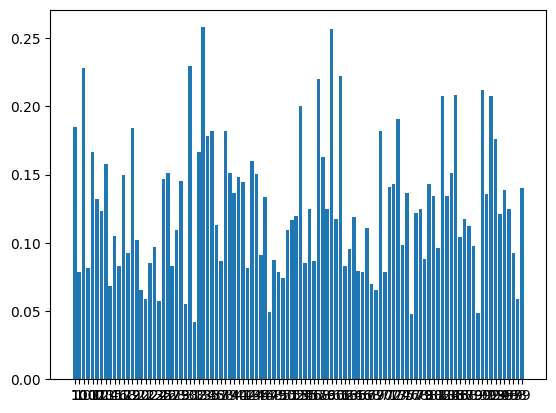

In [2]:
# show the rate of the train and test image amount in different categre

def show_rate():
    train_dir = './102 flower/flowers/train'
    test_dir = './102 flower/flowers/test'
    train_categories = os.listdir(train_dir)
    test_categories = os.listdir(test_dir)
    train_categories.sort()
    test_categories.sort()
    train_image_amount = []
    test_image_amount = []
    for category in train_categories:
        train_image_amount.append(len(os.listdir(os.path.join(train_dir, category))))
    for category in test_categories:
        test_image_amount.append(len(os.listdir(os.path.join(test_dir, category))))
    train_image_amount = np.array(train_image_amount)
    test_image_amount = np.array(test_image_amount)
    rate = test_image_amount / train_image_amount
    plt.bar(train_categories, rate)
    plt.show()

show_rate()

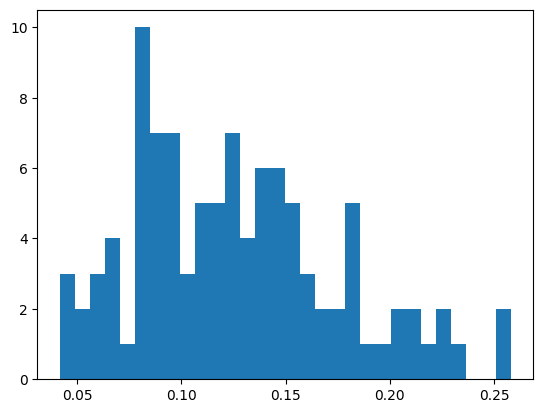

In [3]:
# show the rate distribution of the train and test image amount in different categre

def show_rate_distribution():
    train_dir = './102 flower/flowers/train'
    test_dir = './102 flower/flowers/test'
    train_categories = os.listdir(train_dir)
    test_categories = os.listdir(test_dir)
    train_categories.sort()
    test_categories.sort()
    train_image_amount = []
    test_image_amount = []
    for category in train_categories:
        train_image_amount.append(len(os.listdir(os.path.join(train_dir, category))))
    for category in test_categories:
        test_image_amount.append(len(os.listdir(os.path.join(test_dir, category))))
    train_image_amount = np.array(train_image_amount)
    test_image_amount = np.array(test_image_amount)
    rate = test_image_amount / train_image_amount
    plt.hist(rate, bins=30)
    plt.show()

show_rate_distribution()

Based on the analysis above, the dataset is totaly imbalanced, we decide use ShuffleSplit to do the divding the data. Due to the some categries has the few data and some may have more, shufflesplit would be suitable for this situation. 

When working with limited computational resources or time constraints, ShuffleSplit can be more efficient than stratified 10-fold cross-validation.

In the case of small categories with few images, ShuffleSplit can be particularly useful. By generating random splits, ShuffleSplit provides the opportunity for samples from small categories to appear in both the training and test sets, which can help prevent the exclusion of these categories from the evaluation process.



# 2 Modeling

2.1 data augmentation

In [67]:
    # training to use data expansion in Keras
    # data expansion techniques 
    # Keras augmentation layers


In [4]:
import tensorflow as tf


import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import average 
from tensorflow.keras.models import  Model


# keras version


In [5]:
# SKip it 


#  recombine all the test and train data into one data set and build model , combine all the data into the newflower folder

import time;
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

start_time=time.time()

# already combine
def combine_data():
    train_dir = './102 flower/flowers/train'
    test_dir = './102 flower/flowers/test'
    new_dir = './102 flower/flowers/newflower'
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)
    for category in os.listdir(train_dir):
        if not os.path.exists(os.path.join(new_dir, category)):
            os.makedirs(os.path.join(new_dir, category))
        for image in os.listdir(os.path.join(train_dir, category)):
            shutil.copy(os.path.join(train_dir, category, image), os.path.join(new_dir, category, image))
    for category in os.listdir(test_dir):
        if not os.path.exists(os.path.join(new_dir, category)):
            os.makedirs(os.path.join(new_dir, category))
        for image in os.listdir(os.path.join(test_dir, category)):
            shutil.copy(os.path.join(test_dir, category, image), os.path.join(new_dir, category, image))

# already combine no need run it again
combine_data()

end_time=time.time()
print('time cost',end_time-start_time,'s')

time cost 20.653880834579468 s


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import time 

# we have the sized image in the newflower folder, we need to get the data to X y
# do not need the original 
# 2 m toad the original photo to mamnery 
statt=time.time()

# get the data to X y from the  newflower folder
def get_data():
    new_dir = './102 flower/flowers/newflower'
    X = []
    y = []
    for category in os.listdir(new_dir):
        for image in os.listdir(os.path.join(new_dir, category)):
            img = Image.open(os.path.join(new_dir, category, image))
            img = img.resize((128, 128))
            img = np.array(img) / 255.0
            X.append(img)
            y.append(category)
    X = np.array(X)
    y = np.array(y)
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    y = keras.utils.to_categorical(y, 102)
    return X, y

# X, y = get_data()
endt=time.time()
print('time cost',endt-statt,'s')
# print(X.shape)



time cost 0.0004863739013671875 s


In [7]:
# shuffle the data and split the data into train and test data 
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# not only onetime , just multiple time to run it

# onetime
# load the data and split the data into train and test data

# X_train, X_test, y_train, y_test = split_data(X, y)

# # plot the plot bewteen the xtran and xtest data
# plt.hist(y_train.argmax(axis=1), bins=102, alpha=0.5, label='train')
# plt.hist(y_test.argmax(axis=1), bins=102, alpha=0.5, label='test')
# plt.legend()
# plt.show()



In [8]:
# summry
# for the model


from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline

    


In [19]:
### Data expansion techniques

# image sizde   ImageDataGenerator.

# Keras augmentation layers


In [9]:
# originael model's image size is 224*224 / 


# after fit the X and y , it could geenerat the folder into the new folder named fitedflower and save all the fitted new photo there
# save the fitted photo into the fitedflower folder
def save_fitted_data():
    fitted_dir = './102 flower/flowers/fittedflower'
    if not os.path.exists(fitted_dir):
        os.makedirs(fitted_dir)
    for category in os.listdir('./102 flower/flowers/newflower'):
        if not os.path.exists(os.path.join(fitted_dir, category)):
            os.makedirs(os.path.join(fitted_dir, category))
    for category in os.listdir('./102 flower/flowers/newflower'):
        for image in os.listdir(os.path.join('./102 flower/flowers/newflower', category)):
            img = Image.open(os.path.join('./102 flower/flowers/newflower', category, image))
            img = img.resize((80, 80))
            img.save(os.path.join(fitted_dir, category, image))

# only for first 
save_fitted_data()
# 1m52s


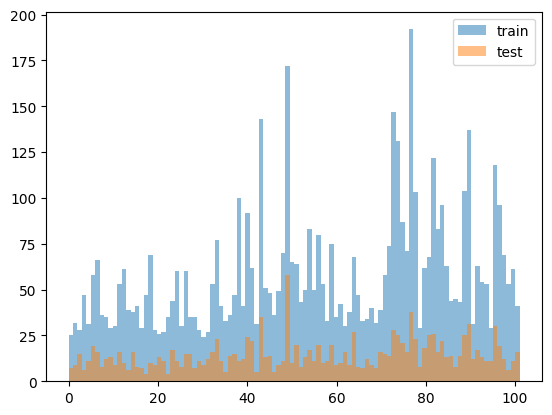

In [10]:
# load the sized image into X,y
from sklearn.preprocessing import LabelEncoder

def get_data():
    new_dir = './102 flower/flowers/fittedflower'
    X = []
    y = []
    for category in os.listdir(new_dir):
        if category != '.DS_Store':
            for image in os.listdir(os.path.join(new_dir, category)):
                img = Image.open(os.path.join(new_dir, category, image))
                img = np.array(img) / 255.0
                X.append(img)
                y.append(category)
    X = np.array(X)
    y = np.array(y)
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    y = keras.utils.to_categorical(y, 102)
    return X, y

X, y = get_data()
# get the shuffle data and split the data into train and test data
X_train, X_test, y_train, y_test = split_data(X, y)

# plot the plot bewteen the xtran and xtest data
plt.hist(y_train.argmax(axis=1), bins=102, alpha=0.5, label='train')
plt.hist(y_test.argmax(axis=1), bins=102, alpha=0.5, label='test')
plt.legend()
plt.show()

### Data expansion techniques

we use the     rotation_range=1,  width_shift_range=0.05,    height_shift_range=0.05

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# use the kaeras to load the image and resize the image to 80*80

# Keras augmentation layers,  
datagen = ImageDataGenerator(
    rotation_range=1,
    width_shift_range=0.05,
    height_shift_range=0.05)

# original X and y is path collection 

# please use the ImageDataGenerator and flow_from_directory to load the image and resize the image to 80*80 to the X and y

# Compute statistics on the data
datagen.fit(X) # generate the tf data 
datagen.fit(X_train) # generate the tf data 

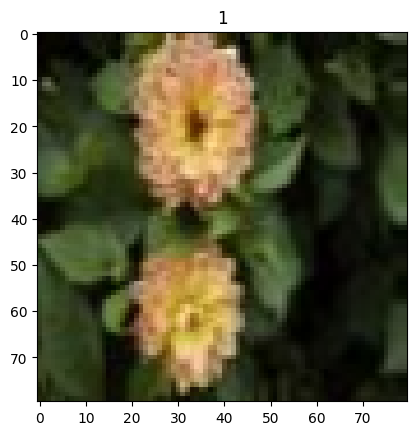

In [48]:
# and one hot encoding the output values
y_train_ohe = keras.utils.to_categorical(y_train, 102)
y_test_ohe = keras.utils.to_categorical(y_test, 102)

tmps = datagen.flow(X_train, y_train_ohe, batch_size=1)
#label is the category of the image
labels = os.listdir('./102 flower/flowers/fittedflower')
for tmp in tmps:
    plt.imshow(tmp[0].squeeze())
    plt.title(labels[np.argmax(tmp[1])])
    break

### Archi 1- Model 1

loss function: Categorical Cross-entroy a

metric  Recall. 

optimizer rmsprop.


In [32]:
# build a cnn model by using the keras and the image size is 80x80 and the classification is 102 

def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(102))
    model.add(Activation('softmax'))
    return model

cnn_model1 = build_model()
cnn_model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['Recall'])
cnn_model1.summary()


/Users/rongweiji/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 80, 80, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 78, 78, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 78, 78, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 39, 39, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 102)            │        52,326 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 102)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,735,238 (40.95 MB)

 Trainable params: 10,735,238 (40.95 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# fit the data 
def fit_model(model, X_train, y_train, X_test, y_test):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

# fit the model
fit_model(cnn_model1, X_train, y_train, X_test, y_test)

Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 180s 973ms/step - Recall: 2.6187e-04 - loss: 4.3401 - val_Recall: 0.0000e+00 - val_loss: 3.7457
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 185s 999ms/step - Recall: 0.0075 - loss: 3.6392 - val_Recall: 0.0190 - val_loss: 3.3137
Epoch 3/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 178s 963ms/step - Recall: 0.0331 - loss: 3.1718 - val_Recall: 0.0488 - val_loss: 2.9992
Epoch 4/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 167s 903ms/step - Recall: 0.1071 - loss: 2.7005 - val_Recall: 0.0637 - val_loss: 3.0163
Epoch 5/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 183s 987ms/step - Recall: 0.1953 - loss: 2.2939 - val_Recall: 0.1119 - val_loss: 2.8150
Epoch 6/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 166s 897ms/step - Recall: 0.2903 - loss: 1.8801 - val_Recall: 0.2481 - val_loss: 2.4126
Epoch 7/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 168s 907ms/step - Recall: 0.4368 - loss: 1.4451 - val_Recall: 0.3268 - val_loss: 2.6825
Epoch 8/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 163s 883ms/step - Recall: 0.6042 - loss: 1.0163 - val_Re

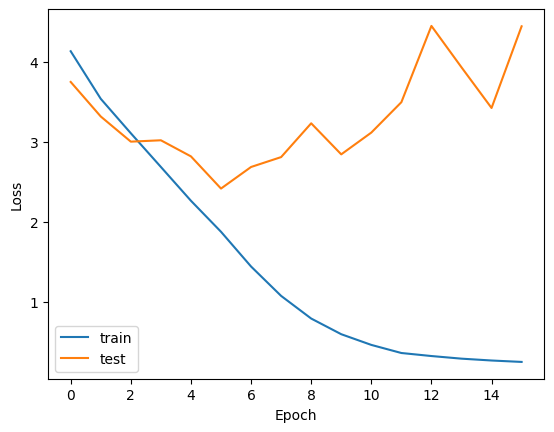

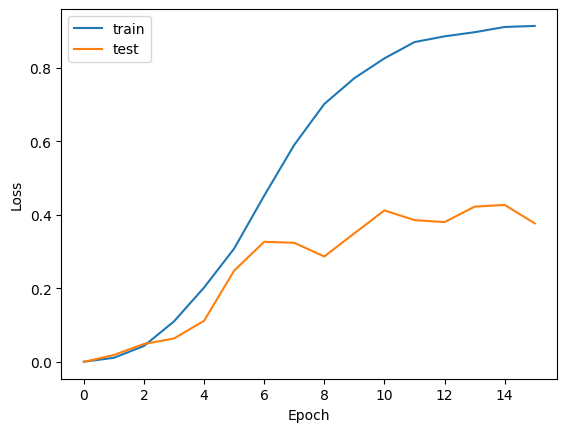

In [37]:
#  loss plot the history of the model
plt.plot(cnn_model1.history.history['loss'], label='train')
plt.plot(cnn_model1.history.history['val_loss'], label='test')
#  x, y label
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# recall plot the history of the model
plt.plot(cnn_model1.history.history['Recall'], label='train')
plt.plot(cnn_model1.history.history['val_Recall'], label='test')
#  x, y label
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [90]:
labels = os.listdir('./102 flower/flowers/newflower')
labels = [file for file in labels if file != ".DS_Store"]
print("count",len(labels),labels)    


def summarize_net(net, X_test, y_test, title_text=''):
    
    plt.figure(figsize=(15,5))

    yhat = np.argmax(net.predict(X_test), axis=1)
    if y_test.ndim > 1:
        y_test = np.argmax(y_test, axis=1)
    acc = mt.recall_score(y_test,yhat,average='micro')

    print("yhat shape",yhat.shape)
    print("ytest shape",y_test.shape)
    
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels,yticklabels=labels)
    plt.title(title_text+'{:.4f}'.format(acc))

def summarize_net_10(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15, 5))

    yhat = np.argmax(net.predict(X_test), axis=1)
    if y_test.ndim > 1:
        y_test = np.argmax(y_test, axis=1)
    acc = mt.recall_score(y_test, yhat, average='micro')

    print("yhat shape", yhat.shape)
    print("ytest shape", y_test.shape)

    cm = mt.confusion_matrix(y_test, yhat)
    cm = cm[:10, :10]  # Selecting only rows and columns corresponding to labels 1 to 10
    cm = cm / np.sum(cm, axis=1)[:, np.newaxis]

    labels = [str(i) for i in range(1, 11)]

    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
    plt.title(title_text + ' {:.4f}'.format(acc))
    plt.show()

count 102 ['61', '95', '59', '92', '66', '50', '68', '57', '32', '35', '102', '69', '56', '51', '58', '67', '93', '94', '60', '34', '33', '20', '18', '27', '9', '11', '7', '29', '16', '42', '89', '45', '73', '87', '80', '74', '6', '28', '17', '1', '10', '19', '26', '8', '21', '75', '81', '86', '72', '44', '43', '88', '38', '36', '31', '91', '65', '62', '96', '100', '54', '98', '53', '30', '37', '39', '99', '52', '101', '55', '97', '63', '64', '90', '46', '79', '41', '83', '77', '48', '70', '84', '24', '23', '4', '15', '3', '12', '85', '71', '76', '82', '49', '40', '47', '78', '2', '13', '5', '14', '22', '25']


47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step
yhat shape (1475,)
ytest shape (1475,)


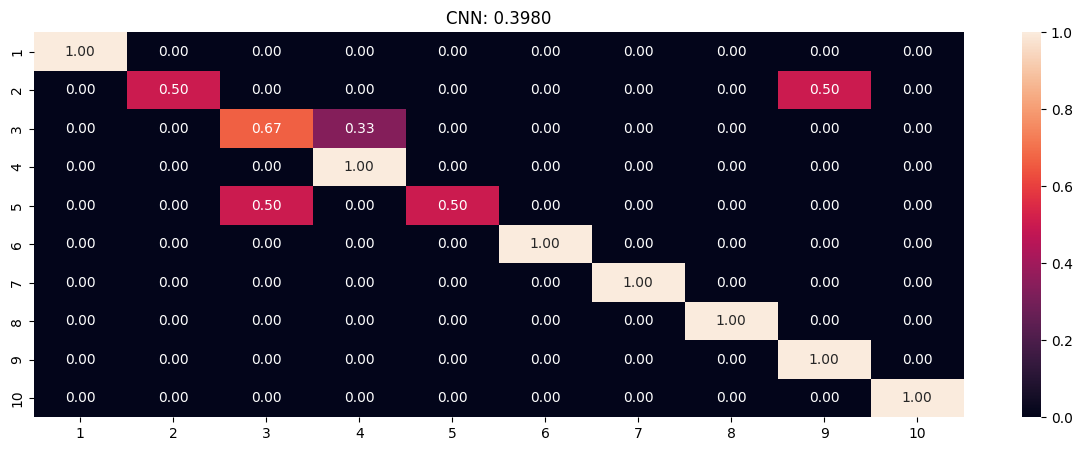

In [91]:
# GETthe y_type 
# only show the 1to 10 confusion matrix
summarize_net_10(cnn_model1, X_test, y_test,title_text='CNN:')

### Archi 1- Model 2
second model ,we change the optimize to adam to try to find if we could increse the recall

In [92]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras.optimizers import Adam

def build_improved_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(102))  # Change output size to match the number of classes
    model.add(Activation('softmax'))
    return model

# Build the improved model
cnn_model2 = build_improved_model()

# Compile the model with Adam optimizer
cnn_model2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['Recall'])

# Print model summary
cnn_model2.summary()


/Users/rongweiji/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 80, 80, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 78, 78, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 78, 78, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 39, 39, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 102)            │        52,326 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 102)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,735,238 (40.95 MB)

 Trainable params: 10,735,238 (40.95 MB)

 Non-trainable params: 0 (0.00 B)

In [94]:
%%time
# Fit the improved model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
histroy_cnn_model2 = cnn_model2.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - Recall: 3.8831e-04 - loss: 4.4830 - val_Recall: 6.7797e-04 - val_loss: 3.7947
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - Recall: 0.0040 - loss: 3.7394 - val_Recall: 0.0014 - val_loss: 3.4465
Epoch 3/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 184s 996ms/step - Recall: 0.0169 - loss: 3.3105 - val_Recall: 0.0468 - val_loss: 3.0102
Epoch 4/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 179s 967ms/step - Recall: 0.0638 - loss: 2.9020 - val_Recall: 0.0746 - val_loss: 2.7256
Epoch 5/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 172s 928ms/step - Recall: 0.1427 - loss: 2.4947 - val_Recall: 0.1166 - val_loss: 2.6103
Epoch 6/20
 21/185 ━━━━━━━━━━━━━━━━━━━━ 3:23 1s/step - Recall: 0.1917 - loss: 2.1103

## Archi2-mode1

In this architecture outlined below, we've incorporated two additional dense layers within the machine learning portion. These additions are aimed at facilitating a more gradual transition towards the classification of the data into the four specified groups. Despite these alterations, I've maintained consistency by retaining the same optimizer and loss function from the original model. Furthermore, I've preserved the implementation of L2 regularization for each dense layer.

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, RandomBrightness, RandomContrast
from tensorflow.keras.regularizers import l2

def create_arch1_cnn2(input_shape=(80, 80, 3), l2_lambda=0.016, num_classes=102):
    arch1_cnn2 = Sequential()

    # add in augmentations directly
    arch1_cnn2.add(RandomBrightness(factor=(-0.3, 0)))
    arch1_cnn2.add(RandomContrast(factor=0.2))

    # let's start with an AlexNet style convolutional phase
    arch1_cnn2.add(Conv2D(filters=32,
                          input_shape=input_shape,
                          kernel_size=(3, 3),
                          padding='same',
                          activation='relu'))  # more compact syntax

    # no max pool before next conv layer!!
    arch1_cnn2.add(Conv2D(filters=64,
                          kernel_size=(3, 3),
                          padding='same',
                          activation='relu'))  # more compact syntax

    arch1_cnn2.add(MaxPooling2D(pool_size=(2, 2)))

    # add one layer on flattened output
    arch1_cnn2.add(Dropout(0.25))  # add some dropout for regularization after conv layers
    arch1_cnn2.add(Flatten())
    arch1_cnn2.add(Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda)))
    arch1_cnn2.add(Dropout(0.5))  # add some dropout for regularization, again!
    arch1_cnn2.add(Dense(num_classes, activation='softmax'))

    # Let's train the model
    arch1_cnn2.compile(loss='categorical_crossentropy',
                       optimizer='adam',
                       metrics=['Recall'])

    arch1_cnn2.build((None, *input_shape))
    arch1_cnn2.summary()

    return arch1_cnn2

# Example usage:
a2_m2 = create_arch1_cnn2()


C:\Users\lycaz\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_brightness_3             │ (None, 80, 80, 3)      │             0 │
│ (RandomBrightness)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_3               │ (None, 80, 80, 3)      │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 80, 80, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 80, 80, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 102400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │     6,553,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 102)            │         6,630 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,579,686 (25.10 MB)

 Trainable params: 6,579,686 (25.10 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
print(X_train.shape)
print(X_test.shape)

(5896, 80, 80, 3)
(1475, 80, 80, 3)


In [54]:
history_arch2_cnn1 = a2_m2.fit(X_train,
            batch_size=64, epochs=30, 
            shuffle=True, verbose=1,
            validation_data=(X_test))

Epoch 1/30


ValueError: None values not supported.